# Graded Challenge 2 - Phase 1
Muhammad Ikhsan Rahman Hakim - FTDS001

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, precision_recall_curve, classification_report, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR

import matplotlib.pyplot as plt
%matplotlib inline

# Data Loading

In [3]:
df = pd.read_csv("weatherAUS.csv")

In [4]:
pd.set_option('display.max_columns', 100)

In [5]:
print('Dimension of the dataset:', df.shape)
df.head()

Dimension of the dataset: (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Data Cleaning

In [8]:
#drop columns
new_df = df.drop(['Cloud3pm','Cloud9am'], axis = 1)
print(new_df.shape)

(145460, 21)


In [9]:
#detect missing value from every columns
new_df.isnull().sum().sort_values(ascending=False)

Sunshine         69835
Evaporation      62790
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
WindSpeed9am      1767
Temp9am           1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

In [10]:
# Drop any rows with null values
new_df.dropna(axis=0, how='any', inplace=True)

In [11]:
new_df.shape

(63167, 21)

In [12]:
#change data types
new_df["Date"] = df["Date"].astype('datetime64')

# Exploratory Data Analysis (EDA)

In [13]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,63167.0,13.174531,6.353956,-6.9,8.4,12.8,18.0,33.9
MaxTemp,63167.0,23.933024,7.004594,4.1,18.4,23.5,29.3,48.1
Rainfall,63167.0,2.082470,6.807960,0.0,0.0,0.0,0.6,206.2
Evaporation,63167.0,5.426449,3.721509,0.0,2.8,4.8,7.4,81.2
Sunshine,63167.0,7.695715,3.768595,0.0,5.0,8.6,10.7,14.5
WindGustSpeed,63167.0,40.987446,13.376231,9.0,31.0,39.0,48.0,124.0
WindSpeed9am,63167.0,15.548878,8.274820,2.0,9.0,15.0,20.0,67.0
WindSpeed3pm,63167.0,19.730698,8.432147,2.0,13.0,19.0,24.0,76.0
Humidity9am,63167.0,66.310653,18.699494,0.0,55.0,67.0,80.0,100.0
Humidity3pm,63167.0,49.849684,20.261649,0.0,36.0,51.0,63.0,100.0


#### Separate feature based on their data type

In [14]:
#find feature based on their data types
ddata_type = new_df.dtypes.reset_index()
ddata_type.columns = ['feature', 'type']

#excluding object data types and feautre 'Date'
ddata_type[(ddata_type['type'] != 'object') & (ddata_type['feature'] != 'Date')]

,feature,type
2,MinTemp,float64
3,MaxTemp,float64
4,Rainfall,float64
5,Evaporation,float64
6,Sunshine,float64
8,WindGustSpeed,float64
11,WindSpeed9am,float64
12,WindSpeed3pm,float64
13,Humidity9am,float64
14,Humidity3pm,float64


In [15]:
dfeats = new_df.dtypes.reset_index()
dfeats.columns = ['feature', 'type']

#grouping all features with object datatype as 'column category'
col_category = list(dfeats[dfeats['type'] == 'object']['feature'])
new_df[col_category].head(10)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
6049,Cobar,SSW,ENE,SW,No,No
6050,Cobar,S,SSE,SSE,No,No
6052,Cobar,NNE,NNE,NNW,No,No
6053,Cobar,WNW,WNW,WSW,No,No
6054,Cobar,WNW,NW,WNW,No,No
6055,Cobar,N,N,WNW,No,No
6056,Cobar,SSW,S,SSE,No,No
6057,Cobar,SE,SE,S,No,No
6058,Cobar,ENE,ENE,WSW,No,No
6059,Cobar,NE,NNE,WSW,No,No


In [16]:
#grouping all features with numeric(int and float) datatype as 'column numeric'
col_numeric = list(dfeats[(dfeats['type'] != 'object') & (~dfeats.feature.isin(['Date']))]['feature'])

new_df[col_numeric].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,26.6,33.4
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,20.3,27.0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,28.7,34.9
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,29.1,35.6
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,33.6,37.6


<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

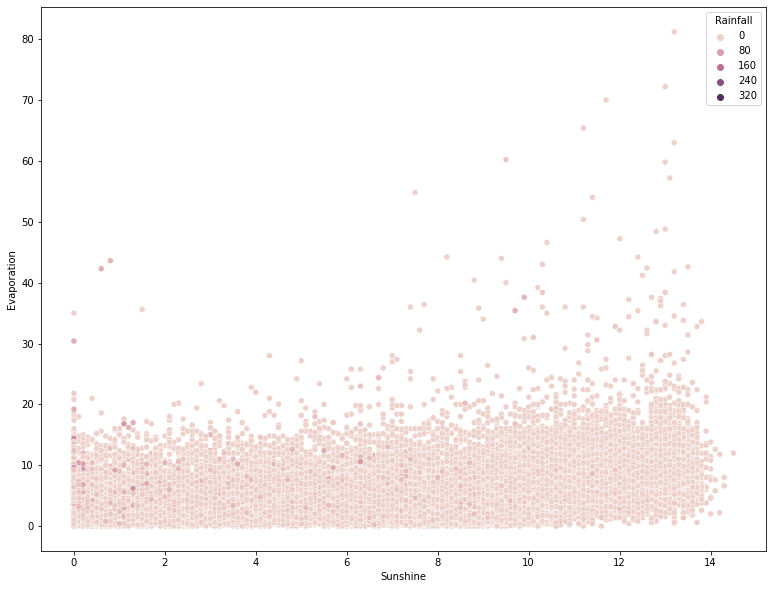

In [17]:
plt.figure(figsize=(13,10))
sns.scatterplot(data=df,x='Sunshine',y="Evaporation",hue='Rainfall')

Rata-rata hujan turun terjadi saat intensitas matahari dan penguapan rendah.

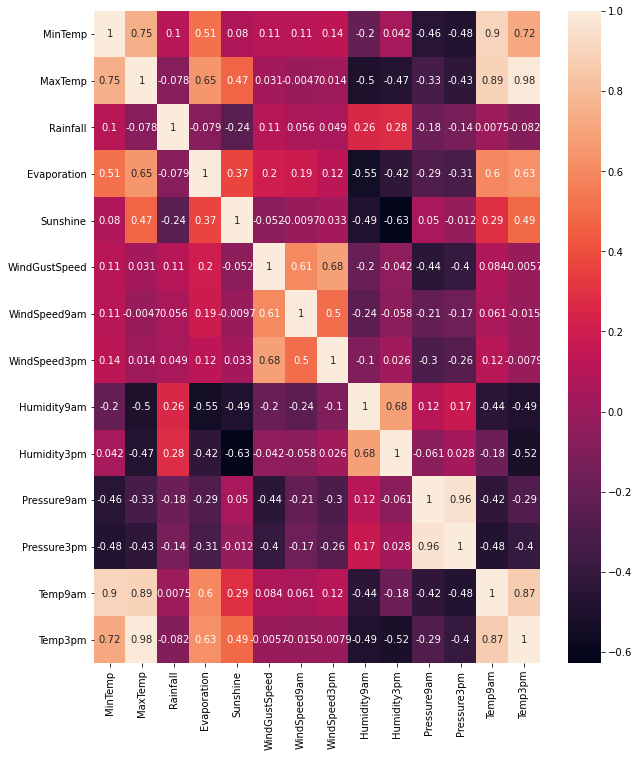

In [18]:
#Check all numeric column correlated with Rainfall
plt.figure(figsize = (10, 12))
hm = sns.heatmap(new_df[col_numeric].corr(), annot = True)

Beberapa feature yang cukup berkorelasi dengan 'Rainfall' adalah 'WindGustSpeed','Humidity9am', 'Humidity3pm', dan 'MinTemp'.

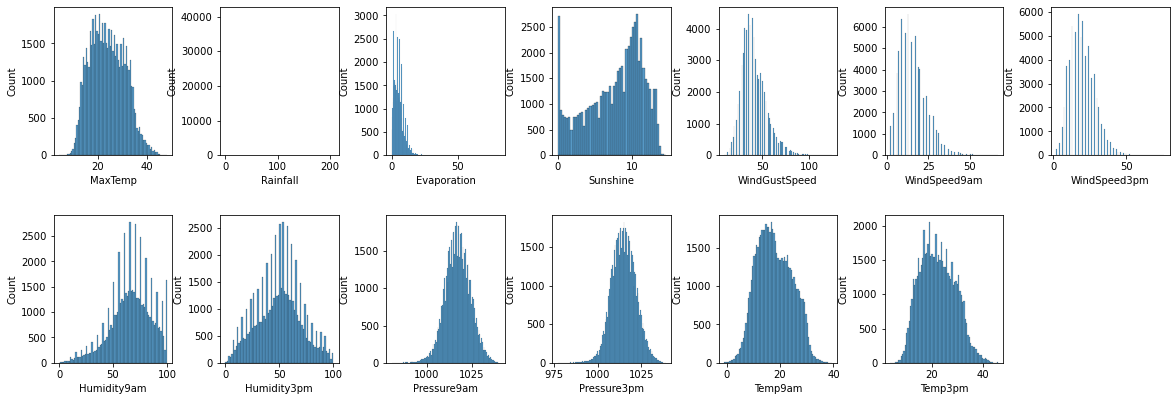

In [19]:
fig = plt.figure(figsize=(20, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(col_numeric)):
    ax = fig.add_subplot(5, 7, i)
#     ax.hist(new_df[col_numeric[i]])
    sns.histplot(new_df[col_numeric[i]])
    plt.xlabel(col_numeric[i])

Rata-rata kolom numerik terdistribusi secara normal.

# Data Transformation

In [20]:
new_df['RainTomorrow'].replace(['Yes', 'No'],[1,0], inplace=True)
new_df['RainToday'].replace(['Yes', 'No'],[1,0], inplace=True)

In [21]:
new_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,26.6,33.4,0,0
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,20.3,27.0,0,0
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,28.7,34.9,0,0
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,29.1,35.6,0,0
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,33.6,37.6,0,0


In [22]:
#features based on column that most correlated with RainTomorrow
feature_cols = ['Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity3pm','Humidity9am','RainToday']
X = new_df[feature_cols]
y = new_df['RainTomorrow']

new_df[feature_cols+['RainTomorrow']].corr()

,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity3pm,Humidity9am,RainToday,RainTomorrow
Rainfall,1.000000,0.109775,0.055788,0.049285,0.276305,0.258824,0.551707,0.253446
WindGustSpeed,0.109775,1.000000,0.605173,0.684480,-0.042378,-0.195209,0.148544,0.238655
WindSpeed9am,0.055788,0.605173,1.000000,0.500464,-0.058375,-0.238406,0.083600,0.086282
WindSpeed3pm,0.049285,0.684480,0.500464,1.000000,0.025708,-0.103855,0.088699,0.095222
Humidity3pm,0.276305,-0.042378,-0.058375,0.025708,1.000000,0.683832,0.385177,0.452196
Humidity9am,0.258824,-0.195209,-0.238406,-0.103855,0.683832,1.000000,0.375263,0.265964
RainToday,0.551707,0.148544,0.083600,0.088699,0.385177,0.375263,1.000000,0.308258
RainTomorrow,0.253446,0.238655,0.086282,0.095222,0.452196,0.265964,0.308258,1.000000


# Modelling

### Split data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=69, stratify=y)

## Data Scalling

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_trf = scaler.transform(X_train) 

## Create model and train

In [25]:
model_lr = LogisticRegression(solver="lbfgs", random_state=69)
%time model_lr.fit(X_train_trf, y_train)

Wall time: 83 ms


LogisticRegression(random_state=69)

In [26]:
from sklearn.svm import SVC
model_svc_linear = SVC(kernel='linear', random_state=69,C=1)
%time model_svc_linear.fit(X_train_trf, y_train)

Wall time: 1min 39s


SVC(C=1, kernel='linear', random_state=69)

## Model Inference Logistic Regression

In [46]:
# classification_report

%time y_test_predict = model_lr.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predict))

Wall time: 3 ms
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4913
           1       0.22      1.00      0.36      1404

    accuracy                           0.22      6317
   macro avg       0.11      0.50      0.18      6317
weighted avg       0.05      0.22      0.08      6317



C:\Users\mistersunday\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mistersunday\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mistersunday\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

cm = confusion_matrix(y_test, y_test_predict)

print(cm)
print(precision_score(y_test, y_test_predict))
print(recall_score(y_test, y_test_predict))


[[   0 4913]
 [   0 1404]]
0.22225740066487257
1.0


In [48]:
%time y_scores = cross_val_predict(model_lr, X_train, y_train, cv=3,method="decision_function")
y_scores

Wall time: 589 ms


array([-0.31373413, -2.87318356, -4.44291265, ..., -1.09352034,
       -0.03732913,  0.97512468])

In [49]:
%time precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Wall time: 8.98 ms


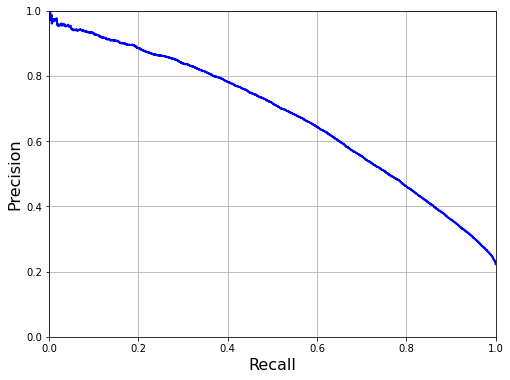

In [50]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

## Model Inference SVC

In [51]:
# classification_report

%time y_test_predict = model_svc_linear.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predict))

Wall time: 4.01 s
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4913
           1       0.22      1.00      0.36      1404

    accuracy                           0.22      6317
   macro avg       0.11      0.50      0.18      6317
weighted avg       0.05      0.22      0.08      6317



C:\Users\mistersunday\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mistersunday\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mistersunday\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
%time cm = confusion_matrix(y_test, y_test_predict)
print(cm)
print(precision_score(y_test, y_test_predict))
print(recall_score(y_test, y_test_predict))

Wall time: 5 ms
[[   0 4913]
 [   0 1404]]
0.22225740066487257
1.0


In [55]:
%time y_scores = cross_val_predict(model_svc_linear, X_train, y_train, cv=3,method="decision_function")
y_scores

Wall time: 39min 2s


array([-0.35690169, -1.92836945, -2.81055907, ..., -0.82115484,
       -0.12213082,  0.68140648])

In [56]:
%time precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Wall time: 9.99 ms


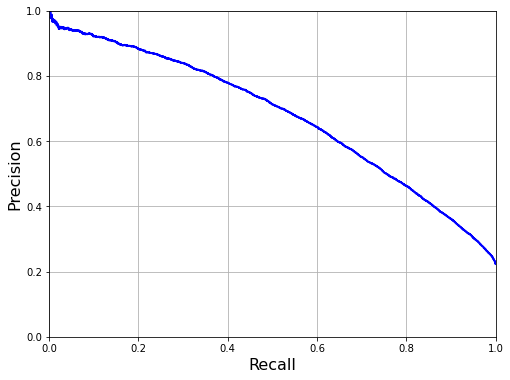

In [57]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

# Model Analysis

## Performance Evaluation LogReg

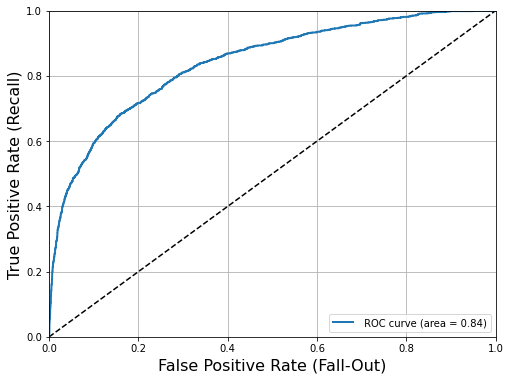

In [44]:
plt.figure(figsize=(8, 6))                                   
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

y_scores = model_lr.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth=2,label=' ROC curve (area = %0.2f)' % roc_auc)

plt.legend(loc="lower right")

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import time

#prediction training result
model_pred_train = model_lr.predict(X_train)

MAE_train = mean_absolute_error(y_train, model_pred_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, model_pred_train))

print('MAE Train : ', MAE_train)
print('RMSE Train : ', MAE_train)
print("R2 score : %.2f" % r2_score(y_train, model_pred_train))

MAE Train :  0.7778012313104662
RMSE Train :  0.7778012313104662
R2 score : -3.50


In [31]:
#prediction test result
model_pred_test = model_lr.predict(X_test)

MAE_test = mean_absolute_error(y_test, model_pred_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, model_pred_test))

print('MAE Test : ', MAE_test)
print('RMSE Test : ', RMSE_test)
print("R2 score : %.2f" % r2_score(y_test, model_pred_test))

MAE Test :  0.7777425993351275
RMSE Test :  0.881897159160368
R2 score : -3.50


## Performance Evaluation SVC

### ROC Curve

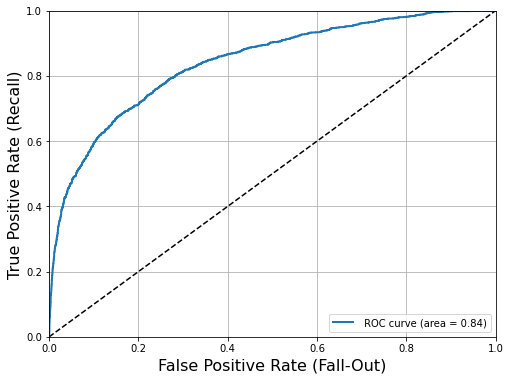

In [34]:
from sklearn.metrics import roc_curve,auc

plt.figure(figsize=(8, 6))                                   
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

y_scores = model_svc_linear.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth=2,label=' ROC curve (area = %0.2f)' % roc_auc)

plt.legend(loc="lower right")

# Conclusion

*Metode clasification pada program ini akan menggunakan 2 metode yaitu, Logistic regression dan SVM untuk mendeteksi apakah besok akan hujan atau tidak.*

Fungsi Recall dan Precision juga untuk mengecek akurasi modelnya. Precision makin tinggi, maka recall akan turun. Begitu juga sebaliknya.

#### LOGISTIC REGRESSION

- ROC curve = 0.86
- Precision = 0.22
- Recall = 1.00
- f1 score = 0.36

#### SVC Linear

- ROC curve = 0.86
- Precision = 0.22
- Recall = 1.00
- f1 score = 0.36

Dari kecepatan waktu taining model, Logistic Regression paling cepat dengan "Wall time: 83 ms", sementara SVC Linear membutuhkan waktu 1min 39s. 

Untuk model inference pun waktu yang diperlukan Logistic Regression juga cukup cepat yakni 589 ms. Sementara SVC Linear membutuhkan waktu 39min 2s.

Pada kedua modeling di atas, keduanya mendapatkan Roc dan Auc yang besar, berarti error yang dimiliki sangat sedikit, dan cocok untuk dataset ini. Namun perlu diperhatikan waktu yang dibutuhkan untuk menjalankan masing-masing model.